In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from datetime import datetime, timedelta
import seaborn as sns

import datetime
from dateutil.parser import parse

import numpy as np


from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (20,10)
# %reset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import glob

all_files = glob.glob("./Duo_Auth*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Francisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])
df['date'] = df['Timestamp (UTC)'].apply(lambda timestamp: timestamp.date())
df['month'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.month)
df['hour'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.hour)
df['minute'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.minute)
df['second'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.second)

In [5]:
logs = df
print(logs.shape)
logs.head(2)

(7077783, 16)


,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10


In [6]:
logs.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10
2,2021-04-01 07:00:11.738361+00:00,user_013462,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,San Francisco,NaN,2021-04-01,4,7,0,11
3,2021-04-01 07:00:25.203564+00:00,user_025756,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Lodi,NaN,2021-04-01,4,7,0,25
4,2021-04-01 07:00:27.389194+00:00,user_030286,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Antioch,NaN,2021-04-01,4,7,0,27


In [7]:
users = pd.read_csv('duo_users_clean.csv')
users['datetime'] = users['Created'].apply(lambda date: parse(date))
users.head()

,Alias,Status,Created,Last Login,Phone 1 platform,Phone 2 platform,Phone 3 platform,Phone 4 platform,Phone 5 platform,Phone 6 platform,Phone 7 platform,Student,Description,Index,datetime
0,user_000001,Active,4/26/2017 18:31,4/7/2021 15:00,Landline,NaN,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),1,2017-04-26 18:31:00
1,user_000002,Active,4/26/2017 18:58,4/6/2021 21:34,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),2,2017-04-26 18:58:00
2,user_000003,Active,4/27/2017 20:42,4/6/2021 16:35,Landline,Android,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),3,2017-04-27 20:42:00
3,user_000004,Active,8/16/2017 17:10,4/7/2021 14:23,iOS,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),4,2017-08-16 17:10:00
4,user_000005,Active,9/12/2017 22:03,4/7/2021 0:17,Android,Landline,NaN,NaN,NaN,NaN,NaN,False,Active (Staff),5,2017-09-12 22:03:00


In [8]:
mask1 = users["Description"] == "Active (Student)"
mask2 = users["Description"] == "Active (Faculty)"
mask3 = users["Description"] == "Active (Staff)"

In [9]:
subsetOfUsers = users[(mask1) | (mask2) | (mask3)]
subsetOfUsers.Description.value_counts()

Active (Student)    34996
Active (Faculty)     1899
Active (Staff)       1204
Name: Description, dtype: int64

In [10]:
typeOfUsers = subsetOfUsers.set_index("Alias")["Description"].to_dict()

In [11]:
logs = logs[logs['Alias'].isin(typeOfUsers)]

In [12]:
logs['Description'] = logs.Alias.apply(lambda alias: typeOfUsers[alias])

<ipython-input-12-489641ab1da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['Description'] = logs.Alias.apply(lambda alias: typeOfUsers[alias])


In [13]:
# Get a list of active students, faculty, and staff that have logged in
activeUsers = logs.Alias.unique()

In [14]:
subsetOfUsers = subsetOfUsers[subsetOfUsers['Alias'].isin(activeUsers)]
len(subsetOfUsers)

35883

In [ ]:
# have to run up to list line when starting

In [14]:
user_phones = subsetOfUsers[["Description","Phone 1 platform","Phone 2 platform","Phone 3 platform"]].groupby("Description").count().sort_values(by=["Phone 1 platform"], ascending=False).transpose()

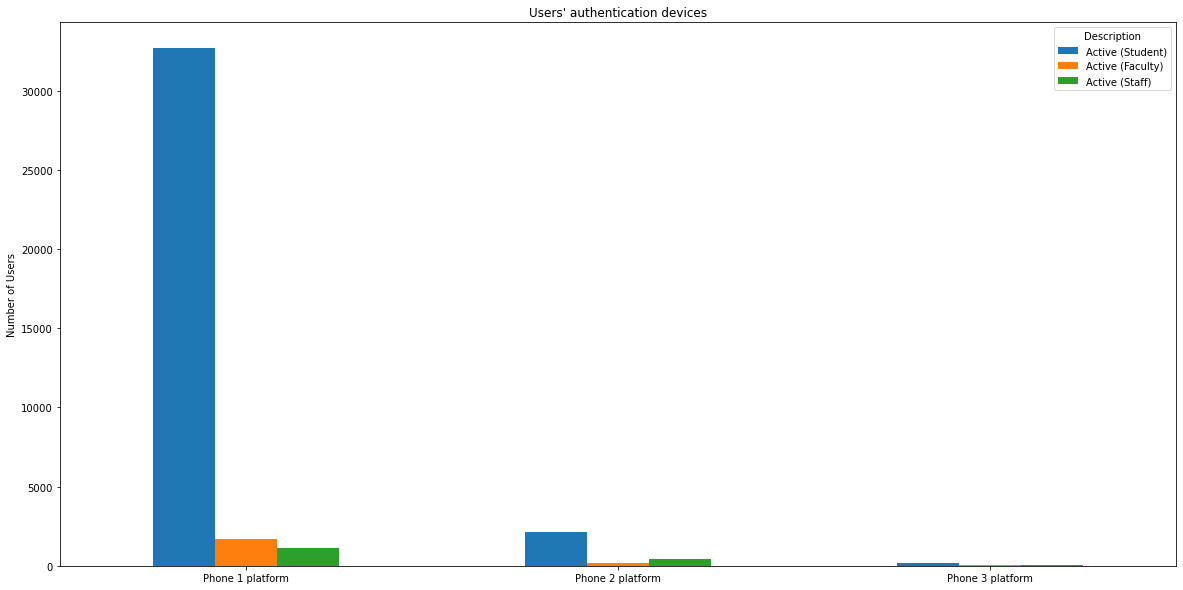

In [15]:
user_phones.plot.bar(rot=0)
plt.title("Users' authentication devices")
plt.ylabel('Number of Users')
# plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [16]:
user_phoneStats = user_phones.transpose()

In [17]:
user_phoneStats['backup'] = round((user_phoneStats['Phone 2 platform'] / (user_phoneStats['Phone 1 platform']))*100,1)

In [18]:
user_phoneStats['two_backup_options'] = round((user_phoneStats['Phone 3 platform'] / (user_phoneStats['Phone 1 platform']))*100,1)

In [19]:
user_phoneStats[['backup','two_backup_options']]

,backup,two_backup_options
Description,,
Active (Student),6.6,0.5
Active (Faculty),10.9,1.2
Active (Staff),34.9,3.6


In [ ]:
# Monthly user Logins

In [175]:
numberOfUsersPerMonth = logs.groupby('month').count()[['Alias']]

In [20]:
# Users Created after november
usersCreatedAfterNovember = subsetOfUsers[subsetOfUsers['datetime']>'2020-11-01']
usersCreatedAfterNovember.shape

(1029, 15)

In [21]:
typeOfUsersAfterNovember = usersCreatedAfterNovember.set_index("Alias")["Description"].to_dict()

In [22]:
enrollmentAnlysisLogs = logs[logs['Alias'].isin(typeOfUsersAfterNovember)]

In [23]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Remembered device']

In [24]:
enrollmentAnlysisLogs.set_index('Alias', inplace=True)

In [25]:
# FacultyEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])

In [26]:
# StaffEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])

In [27]:
# def addToDataFrame(data, description):
#     print(description)
#     if(description=='Active (Student)'):
#         df_length = len(userEnrollmentLogs)
#         userEnrollmentLogs.loc[df_length] = data
#     elif(description=='Active (Faculty)'):
#         df_length = len(FacultyEnrollmentLogs)
#         FacultyEnrollmentLogs.loc[df_length] = data
#     elif(description=='Active (Staff)'):
#         df_length = len(StaffEnrollmentLogs)
#         StaffEnrollmentLogs.loc[df_length] = data
        
        
def addToDataFrame(data):
    df_length = len(userEnrollmentLogs)
    userEnrollmentLogs.loc[df_length] = data

In [28]:
userEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])
# success and failure data

# users who have authenticated at least 10 times
usersWithTenAuth = []

for user in usersCreatedAfterNovember.Alias:
    array = []
    counter = 0
    errorRate = 0
    failures = 0
    if(len(enrollmentAnlysisLogs.loc[user]['Result'])<10):
        continue
    usersWithTenAuth.append(user)
    for i in enrollmentAnlysisLogs.loc[user]['Result']:
        counter += 1
        array.append(i)
        if(counter==10):
            break
#     print(enrollmentAnlysisLogs.loc[user].Description)
    addToDataFrame(array)

In [29]:
userEnrollmentLogs.shape

(766, 10)

In [30]:
userEnrollmentLogs.head()

,1,2,3,4,5,6,7,8,9,10
0,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
1,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,SUCCESS,SUCCESS,SUCCESS,SUCCESS
2,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
3,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,FAILURE
4,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS


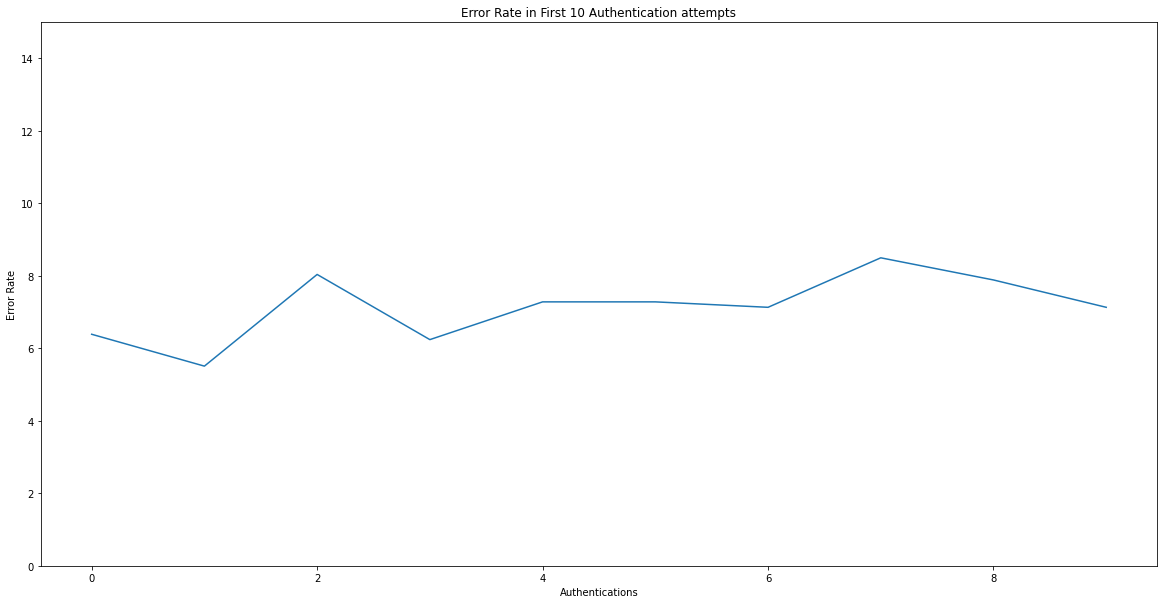

In [31]:
successVsfailureEnrollmentLogs = []
for i in range(1,11):
    value = (userEnrollmentLogs[[str(i)]].value_counts()[1] / userEnrollmentLogs[[str(i)]].value_counts()[0])*100
    successVsfailureEnrollmentLogs.append(value)
plt.ylim(0,15)
plt.title('Error Rate in First 10 Authentication attempts')
plt.ylabel('Error Rate')
plt.xlabel('Authentications')
# plt.xticks([2,3,4,5,6,7,8,9,10])
plt.plot(successVsfailureEnrollmentLogs)

plt.show()
plt.rcParams["figure.figsize"] = (20,10)
# print(successVsfailureEnrollmentLogs)

In [32]:
errorRateAnlysisPerUser = userEnrollmentLogs.stack()
errorRateAnlysisPerUser.name = 'Result'

In [33]:
a = errorRateAnlysisPerUser.reset_index()

In [34]:
a.head()

,level_0,level_1,Result
0,0,1,SUCCESS
1,0,2,SUCCESS
2,0,3,SUCCESS
3,0,4,SUCCESS
4,0,5,SUCCESS


In [35]:
b = a.groupby(['level_0','Result']).count().unstack(level=1).fillna(0)

In [36]:
b.columns = b.columns.droplevel()

In [37]:
b['errorRate'] = b['FAILURE'] / 10

In [38]:
b.head()

Result,FAILURE,SUCCESS,errorRate
level_0,,,
0,0.0,10.0,0.0
1,1.0,9.0,0.1
2,0.0,10.0,0.0
3,2.0,8.0,0.2
4,0.0,10.0,0.0


In [39]:
b.errorRate.value_counts()

0.0    488
0.1    177
0.2     49
0.3     21
0.4     11
0.5      6
0.6      5
0.7      5
0.8      3
0.9      1
Name: errorRate, dtype: int64

In [40]:
c = b.errorRate.value_counts().reset_index()

In [41]:
c = c.rename(columns={"index": "error_rate", "errorRate": "total_users"})

In [42]:
c['total_users'] = c['total_users']/766

In [43]:
c.set_index('error_rate', inplace=True)

In [44]:
c

,total_users
error_rate,
0.0,0.637076
0.1,0.231070
0.2,0.063969
0.3,0.027415
0.4,0.014360
0.5,0.007833
0.6,0.006527
0.7,0.006527
0.8,0.003916


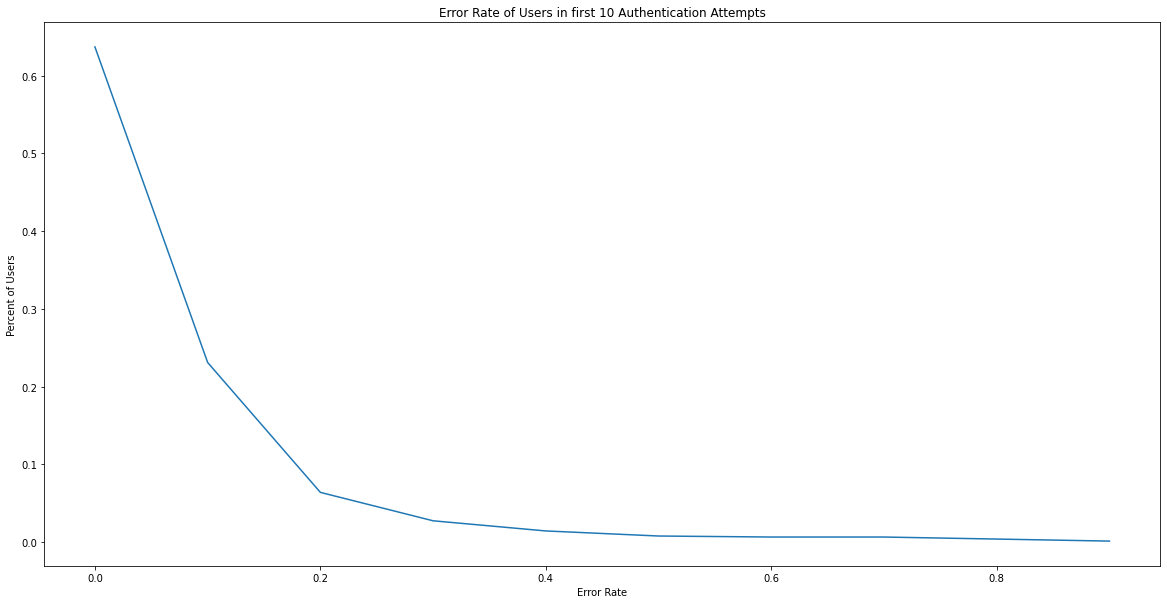

In [45]:
# n = 766
plt.plot(c)
plt.xlabel('Error Rate')
plt.ylabel('Percent of Users')
plt.title('Error Rate of Users in first 10 Authentication Attempts')
plt.show()

In [49]:
# Success Rate by month

In [60]:
users_logs_by_month = logs[logs['month']!=5][["month","Result","Reason"]].groupby(["month","Result"]).count()

In [61]:
users_logs_by_month.head()

Reason
month Result         
1     FAILURE   52240
      FRAUD        17
      SUCCESS  877108
2     FAILURE   47489
      FRAUD        18

In [96]:
ax = users_logs_by_month.unstack(level=1)
ax.columns = ax.columns.droplevel()
ax.drop(columns=['FRAUD'], inplace=True)

In [97]:
ax['success_percent'] = round((ax['SUCCESS'] / (ax['SUCCESS'] + ax['FAILURE'])),2)
ax['failure_percent'] = round((ax['FAILURE'] / (ax['SUCCESS'] + ax['FAILURE'])),2)

In [98]:
ax

Result,FAILURE,SUCCESS,success_percent,failure_percent
month,,,,
1,52240,877108,0.94,0.06
2,47489,1064246,0.96,0.04
3,41964,936941,0.96,0.04
4,46608,1075649,0.96,0.04
11,57298,1058468,0.95,0.05
12,42738,805198,0.95,0.05


In [99]:
new_index = [11,12,1,2,3,4]
ax = ax.reindex(new_index)

In [100]:
ax = ax.rename(index={11: 'November', 12: 'December', 1: 'January', 2: 'February', 3: 'March', 4: 'April'})

In [102]:
ax

Result,FAILURE,SUCCESS,success_percent,failure_percent
month,,,,
November,57298,1058468,0.95,0.05
December,42738,805198,0.95,0.05
January,52240,877108,0.94,0.06
February,47489,1064246,0.96,0.04
March,41964,936941,0.96,0.04
April,46608,1075649,0.96,0.04


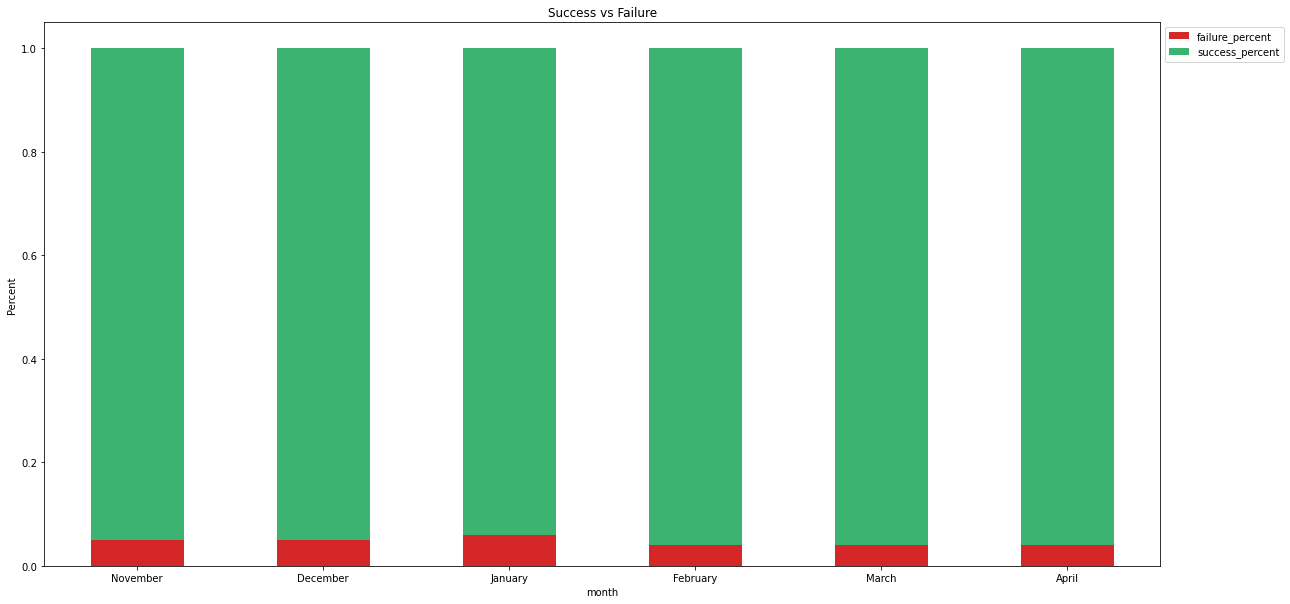

In [126]:
# ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0)
ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0, color=['tab:red','mediumseagreen'])
# ax[['FAILURE','SUCCESS']].plot(rot=0, color=['tab:red','mediumseagreen'])
plt.title('Success vs Failure')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [133]:
users_logs = logs[['Description',"Alias","Result","Reason"]].groupby(['Description',"Alias","Result"]).count()

In [134]:
u = users_logs.unstack(level=2)
u.columns = u.columns.droplevel()
u['successRate'] = (u['SUCCESS'] / (u['FAILURE'] + u['SUCCESS']))*100
u.reset_index(inplace=True)
processedU = u[u['successRate']>86]

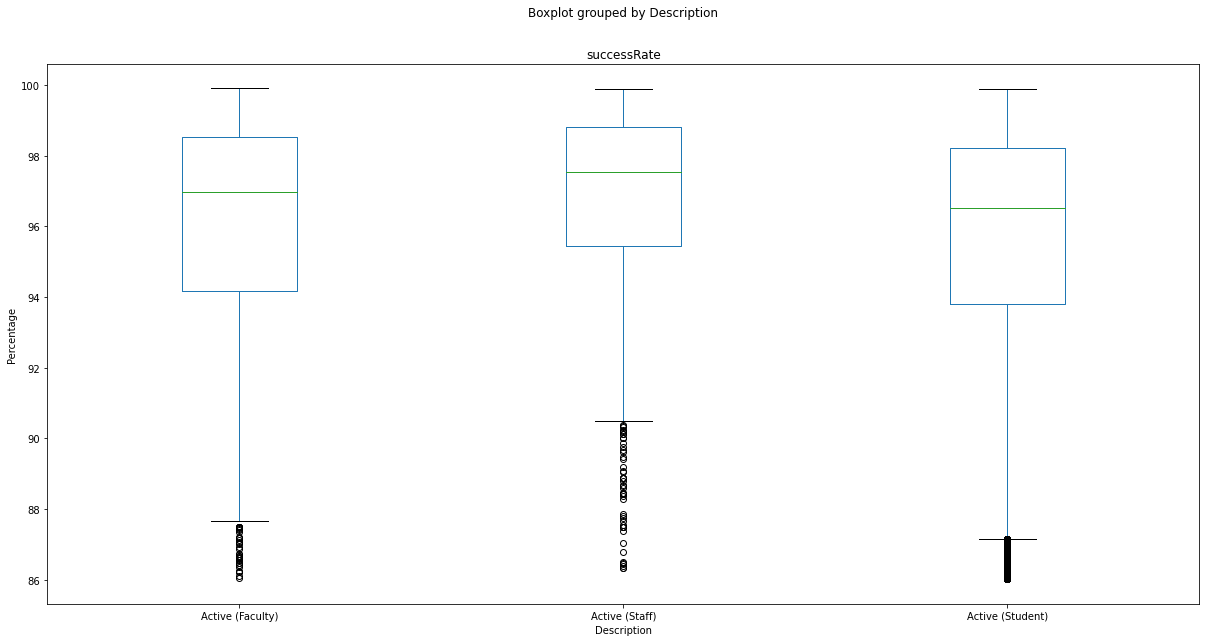

In [137]:
plt.rcParams["figure.figsize"] = (20,10)
processedU.boxplot(column=['successRate'], by='Description', grid=False)
plt.ylabel('Percentage')
plt.show()

In [ ]:
# Number of times users login per day

In [170]:
authenticationsPerDay = logs[['Description',"Alias","Result","date"]]

In [171]:
authenticationsPerDay.head()

,Description,Alias,Result,date
0,Active (Student),user_008576,SUCCESS,2021-04-01
1,Active (Student),user_049277,SUCCESS,2021-04-01
3,Active (Student),user_025756,SUCCESS,2021-04-01
4,Active (Student),user_030286,SUCCESS,2021-04-01
5,Active (Student),user_019093,SUCCESS,2021-04-01


In [ ]:
# Types of Factor that users use

In [115]:
factorsBeingUsed = logs.reset_index()[['Factor','Description','Reason','Alias']]
factorsBeingUsed.head(1)

,Factor,Description,Reason,Alias
0,Phone Call,Active (Student),User approved,user_008576


In [116]:
an = factorsBeingUsed.groupby(['Description','Factor','Alias']).count()

In [117]:
an = an.unstack(level=2)

In [118]:
r = an.count(axis=1)

In [119]:
factorUsage = r.reset_index()

In [121]:
def computePercentageOfGroup(row):
    if(row['Description']=='Active (Faculty)'):
        return round((row[0] / 1773) * 100, 1)
    elif(row['Description']=='Active (Staff)'):
        return round((row[0] / 1179) * 100, 1)
    elif(row['Description']=='Active (Student)'):
        return round((row[0] / 32931) * 100, 1)

In [122]:
factorUsage['percentOfPopulation'] = factorUsage.apply(lambda row: computePercentageOfGroup(row), axis=1)

In [123]:
factorUsageResult = factorUsage.set_index(['Description','Factor'])['percentOfPopulation'].unstack(level=1).transpose().fillna(0).sort_values(by='Active (Student)', ascending=False)
factorUsageResult

Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Passcode,17.3,25.0,11.4
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1


In [112]:
# Types of Errors by group
groupFactorRates = logs[['Factor','Result','Reason','Description']]
groupFactorRates = groupFactorRates.groupby(['Factor','Result','Description']).count()
groupFactorRates = groupFactorRates.unstack(level=1)
groupFactorRates.columns = groupFactorRates.columns.droplevel()
groupFactorRates.fillna(value=0,inplace=True)
groupFactorRates['FAILURE_RATE'] = round((groupFactorRates['FAILURE'] / (groupFactorRates['FAILURE'] + groupFactorRates['SUCCESS']))*100,2)
groupFactorRates = groupFactorRates[['FAILURE_RATE']].unstack(level=1)
groupFactorRates.columns = groupFactorRates.columns.droplevel()
groupFactorRates = groupFactorRates.drop(['Bypass Status','Remembered Device'])
groupFactorRates.sort_values(by='Active (Student)', ascending=False).fillna(0)

Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Passcode,100.00,100.00,100.00
Yubikey Passcode,0.00,0.00,100.00
Bypass Code,2.15,77.78,16.27
Phone Call,3.54,3.44,3.91
Duo Push,3.38,2.55,2.92
Duo Mobile Passcode,1.60,1.02,1.39
Hardware Token,0.04,0.04,0.05
Security Key (WebAuthn),0.00,0.00,0.00
Touch ID (WebAuthn),0.00,0.00,0.00


In [ ]:
# How many times do users log in outside the avilability for support

In [127]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

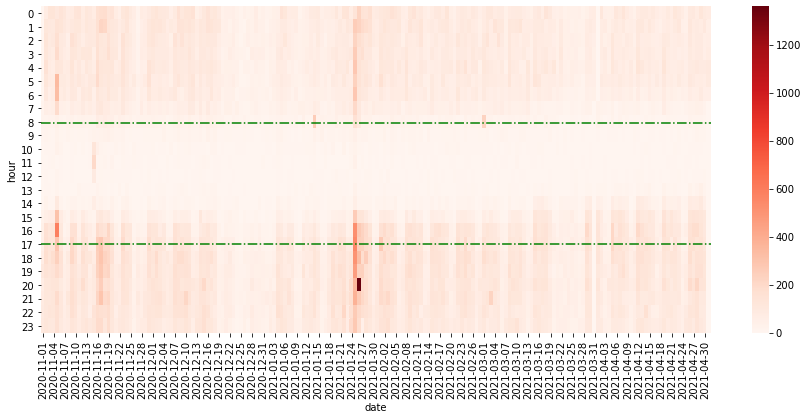

In [132]:

df_m = authenticationFailures.groupby(["date", "hour"]).size().unstack(level=0)
df_m = df_m.fillna(0)
rcParams['figure.figsize'] = 15,6
ax = sns.heatmap(df_m, cmap='Reds')
# plt.xticks(rotation=45)
ax.hlines([8.6,17.5],*ax.get_xlim(), color='green', linestyle='dashdot')
plt.yticks(rotation=0)
# plt.xticks(rotation=80)
plt.show()
plt.rcParams["figure.figsize"] = (20,50)

In [613]:
logs.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7,Active (Student)
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10,Active (Student)
3,2021-04-01 07:00:25.203564+00:00,user_025756,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Lodi,NaN,2021-04-01,4,7,0,25,Active (Student)
4,2021-04-01 07:00:27.389194+00:00,user_030286,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Antioch,NaN,2021-04-01,4,7,0,27,Active (Student)
5,2021-04-01 07:00:30.814923+00:00,user_019093,Single Sign-On,Duo Push,SUCCESS,User approved,False,PH,Metro Manila,Pasig,NaN,2021-04-01,4,7,0,30,Active (Student)


In [595]:
failureMask = authenticationFailures['hour'] < 8
failureMaskTwo = authenticationFailures['hour'] > 17

In [603]:
failureMaskThree = authenticationFailures['hour'] > 8
failureMaskFour = authenticationFailures['hour'] < 17

In [600]:
averageAuthFailures = authenticationFailures[failureMask | failureMaskTwo]

In [607]:
averageAuthFailuresInSupportTime = authenticationFailures[~(failureMask | failureMaskTwo)]

In [611]:
averageAuthFailures = averageAuthFailures[['date','month']].groupby(['month']).count()
averageAuthFailures.drop([5], inplace=True)

In [612]:
averageAuthFailures / averageAuthFailuresInSupportTime

,date
month,
1,41215
2,37486
3,32374
4,34131
11,44706
12,34715


In [614]:
averageAuthFailuresInSupportTime = averageAuthFailuresInSupportTime[['date','month']].groupby(['month']).count()

In [619]:
# Failures outside of support time
round((averageAuthFailures / (averageAuthFailures + averageAuthFailuresInSupportTime))*100,1)

,date
month,
1,78.9
2,78.9
3,77.1
4,73.2
11,78.0
12,81.2


# Recvoery time

In [38]:
userAuthLogs = logs

In [39]:
userAuthLogs.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7,Active (Student)
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10,Active (Student)
3,2021-04-01 07:00:25.203564+00:00,user_025756,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Lodi,NaN,2021-04-01,4,7,0,25,Active (Student)
4,2021-04-01 07:00:27.389194+00:00,user_030286,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Antioch,NaN,2021-04-01,4,7,0,27,Active (Student)
5,2021-04-01 07:00:30.814923+00:00,user_019093,Single Sign-On,Duo Push,SUCCESS,User approved,False,PH,Metro Manila,Pasig,NaN,2021-04-01,4,7,0,30,Active (Student)


In [69]:
y = userAuthLogs.sort_values(by=['Alias','Timestamp (UTC)'])

MemoryError: Unable to allocate 46.8 MiB for an array with shape (6130032,) and data type int64

In [ ]:
y

In [62]:
y.reset_index(inplace=True)

In [63]:
y = y[:1000]

In [64]:
y.set_index(['Alias','Timestamp (UTC)'], inplace=True)

In [65]:
o = y[['Result']]

In [ ]:
len(o.loc['user_000039'])

In [67]:
x = o.loc[['user_000001']].unstack(level=1)
x.head()

KeyError: "['user_000001'] not in index"

In [ ]:
x = o[:15086].unstack(level=1)
x.shape

In [ ]:
# x.head()

In [ ]:
x.columns = x.columns.droplevel()

In [413]:
timesForRecovery = x.apply(lambda logins: computeRecoveryTime(logins), axis=1)

In [428]:
l = o.index

In [53]:
subsetOfUsers.shape

(35883, 15)

In [18]:
import numpy as np

In [81]:
arr = []
for i in subsetOfUsers.Alias:
    if i in o.index:
        x = o.loc[[i]].unstack(level=1)
        x.columns = x.columns.droplevel()
        timesForRecovery = x.apply(lambda logins: computeRecoveryTime(logins), axis=1)
        if(len(timesForRecovery[0])>0):
            meanRecoveryTime = np.mean(np.array(timesForRecovery[0])).total_seconds()
            arr.append([timesForRecovery.index[0], meanRecoveryTime])
        else:
            arr.append([timesForRecovery.index[0], 0])

In [82]:
y = pd.DataFrame(arr, columns=['user', 'recovery_time'])

In [83]:
# y.to_csv('updatedRT.csv', index=False)

In [472]:
y['recovery_time'].describe()

count     35883
unique    31432
top           0
freq       4421
Name: recovery_time, dtype: int64

In [50]:
def computeRecoveryTime(logins):
    logins.dropna()
    i = 0
    recoveryTimes = []
    while i < len(logins) - 1:
        if(logins[i]=='FAILURE'):
            j = i + 1
            if(j>=len(logins)):
                    return recoveryTimes
            while(logins[j]=='FAILURE'):
                j = j + 1
                if(j>=len(logins)):
                    return recoveryTimes
            delta = logins.index[j] - logins.index[i]
            recoveryTimes.append(delta)
            i = j
        i = i + 1
    
    if(len(recoveryTimes)<=0):
        return []
    else:
        return recoveryTimes

In [ ]:
subsetOfUsers

In [15]:
# test

hello


In [47]:
logs.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
0,2021-04-01 07:00:07.957411+00:00,user_008576,Single Sign-On,Phone Call,SUCCESS,User approved,False,US,California,Rocklin,NaN,2021-04-01,4,7,0,7,Active (Student)
1,2021-04-01 07:00:10.492910+00:00,user_049277,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Santa Maria,NaN,2021-04-01,4,7,0,10,Active (Student)
3,2021-04-01 07:00:25.203564+00:00,user_025756,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Lodi,NaN,2021-04-01,4,7,0,25,Active (Student)
4,2021-04-01 07:00:27.389194+00:00,user_030286,Single Sign-On,Duo Push,SUCCESS,User approved,False,US,California,Antioch,NaN,2021-04-01,4,7,0,27,Active (Student)
5,2021-04-01 07:00:30.814923+00:00,user_019093,Single Sign-On,Duo Push,SUCCESS,User approved,False,PH,Metro Manila,Pasig,NaN,2021-04-01,4,7,0,30,Active (Student)


In [48]:
h = logs[logs['Alias']=='user_000001']

In [51]:
h.sort_values(by='Timestamp (UTC)', inplace=True)

<ipython-input-51-79da96dcb269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h.sort_values(by='Timestamp (UTC)', inplace=True)


In [60]:
h

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
5787509,2020-11-02 15:37:30.317691+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Woodland,NaN,2020-11-02,11,15,37,30,Active (Staff)
5790793,2020-11-02 16:32:17.493602+00:00,user_000001,Single Sign-On,Remembered Device,SUCCESS,Remembered device,False,US,California,Woodland,NaN,2020-11-02,11,16,32,17,Active (Staff)
5800609,2020-11-02 18:34:35.045528+00:00,user_000001,Single Sign-On,Remembered Device,SUCCESS,Remembered device,False,US,California,Woodland,NaN,2020-11-02,11,18,34,35,Active (Staff)
5894561,2020-11-04 16:58:08.512838+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Woodland,NaN,2020-11-04,11,16,58,8,Active (Staff)
5997081,2020-11-06 16:00:09.897455+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Woodland,NaN,2020-11-06,11,16,0,9,Active (Staff)
6093809,2020-11-09 15:20:14.085059+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Woodland,NaN,2020-11-09,11,15,20,14,Active (Staff)
6094808,2020-11-09 15:45:45.090503+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Antelope,NaN,2020-11-09,11,15,45,45,Active (Staff)
6106794,2020-11-09 18:20:39.744943+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Antelope,NaN,2020-11-09,11,18,20,39,Active (Staff)
6131553,2020-11-09 23:57:26.776457+00:00,user_000001,Single Sign-On,Remembered Device,SUCCESS,Remembered device,False,US,California,Woodland,NaN,2020-11-09,11,23,57,26,Active (Staff)
6159636,2020-11-10 17:14:15.444533+00:00,user_000001,Single Sign-On,Hardware Token,SUCCESS,Valid passcode,False,US,California,Woodland,NaN,2020-11-10,11,17,14,15,Active (Staff)


# Read in Recovery time

In [16]:
y = pd.read_csv('updatedRT.csv')

In [17]:
y['Description'] = y.user.apply(lambda alias: typeOfUsers[alias])

In [18]:
y['recovery_time'] = y['recovery_time'].astype(int)

In [19]:
y['recovery_time_in_minutes'] = y['recovery_time'].apply(lambda seconds: seconds // 60)

In [20]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    print(min, sec)
    if min != 0:
        return min
    else:
        return sec      

In [21]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
0,user_000001,19,Active (Staff),0
1,user_000002,30067,Active (Staff),501
2,user_000003,345,Active (Staff),5
3,user_000004,5,Active (Staff),0
4,user_000005,164,Active (Staff),2


In [28]:
e = y[y['recovery_time']<86400]

In [36]:
e = y[y['recovery_time_in_minutes']<1440]

In [37]:
e.groupby('Description').mean()

,recovery_time,recovery_time_in_minutes
Description,,
Active (Faculty),5634.855809,93.532399
Active (Staff),4799.838482,79.601059
Active (Student),9666.015282,160.716301


In [101]:
timePerGroup = y.groupby(['Description','recovery_time_in_minutes'])[['user']].count()

In [106]:
a = timePerGroup.reset_index()

In [108]:
a = a[a['recovery_time_in_minutes']<4000]

In [109]:
a.head()

,Description,recovery_time_in_minutes,user
0,Active (Faculty),0,768
1,Active (Faculty),1,134
2,Active (Faculty),2,53
3,Active (Faculty),3,35
4,Active (Faculty),4,30


In [115]:
a[['Description','recovery_time_in_minutes']].groupby('Description').mean()

,recovery_time_in_minutes
Description,
Active (Faculty),521.754808
Active (Staff),560.559028
Active (Student),1448.365431


In [73]:
y['recovery_time_in_minutes'].mean()

520.3868126968202

In [88]:
y['recovery_time_in_minutes'].max()

193251

In [89]:
a = y[y['recovery_time_in_minutes']<4000]

In [84]:
a = y

In [117]:
a.head(100)

,Description,recovery_time_in_minutes,user
0,Active (Faculty),0,768
1,Active (Faculty),1,134
2,Active (Faculty),2,53
3,Active (Faculty),3,35
4,Active (Faculty),4,30
5,Active (Faculty),5,18
6,Active (Faculty),6,10
7,Active (Faculty),7,8
8,Active (Faculty),8,12
9,Active (Faculty),9,9


(0.0, 4000.0)

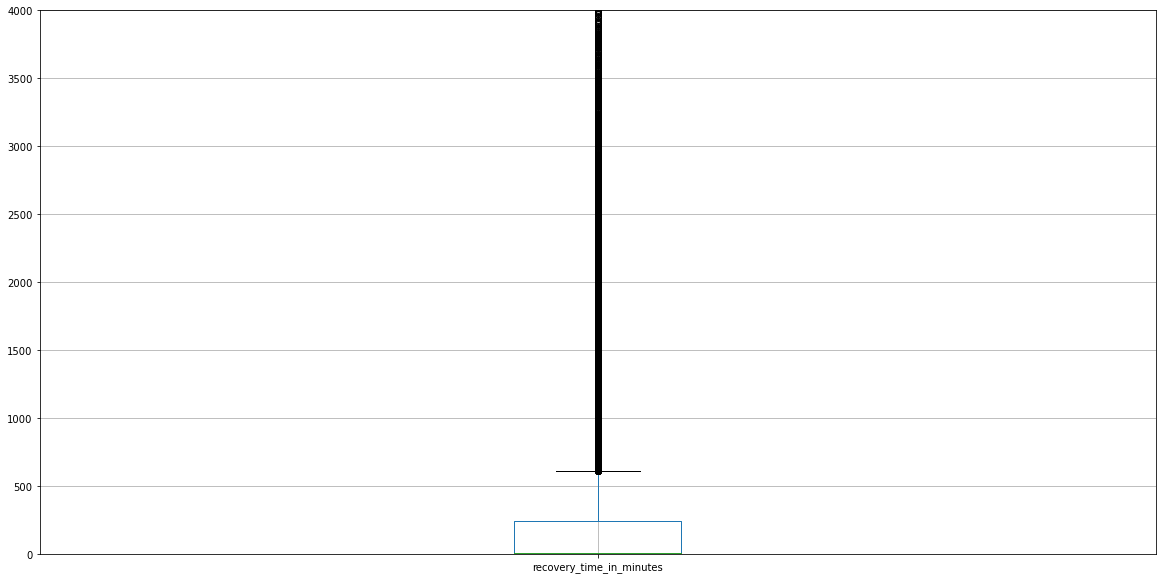

In [91]:
a.boxplot('recovery_time_in_minutes')
plt.ylim(0,4000)

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='recovery_time_in_minutes', ylabel='Description'>

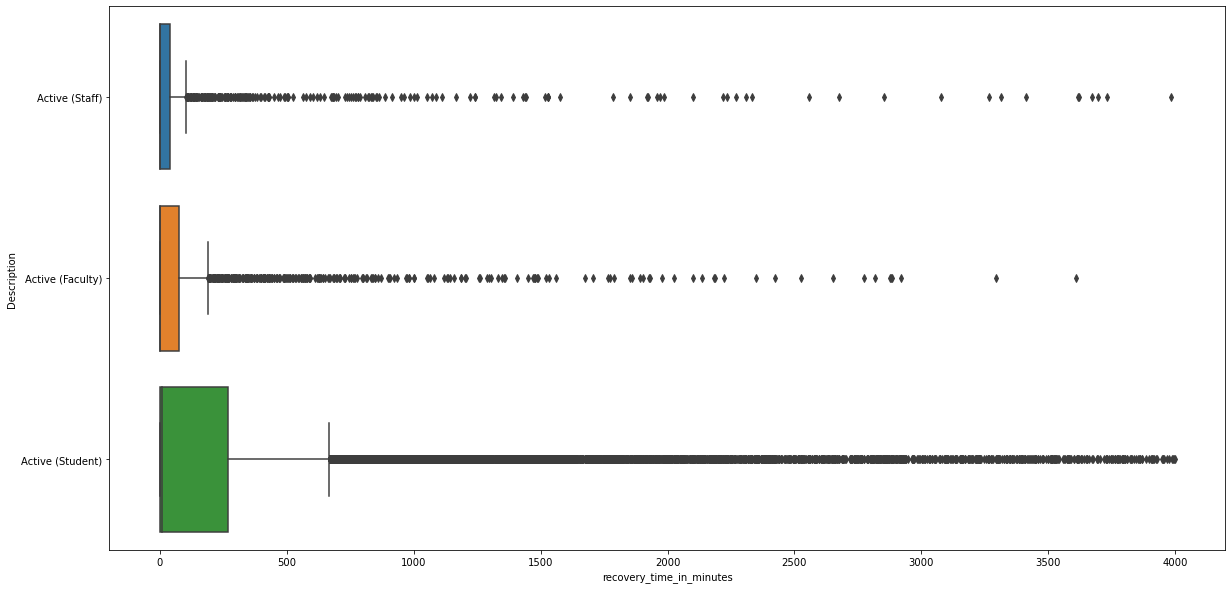

In [93]:
sns.boxplot(x="recovery_time_in_minutes", y="Description", data=a)

<AxesSubplot:xlabel='Description', ylabel='recovery_time_in_minutes'>

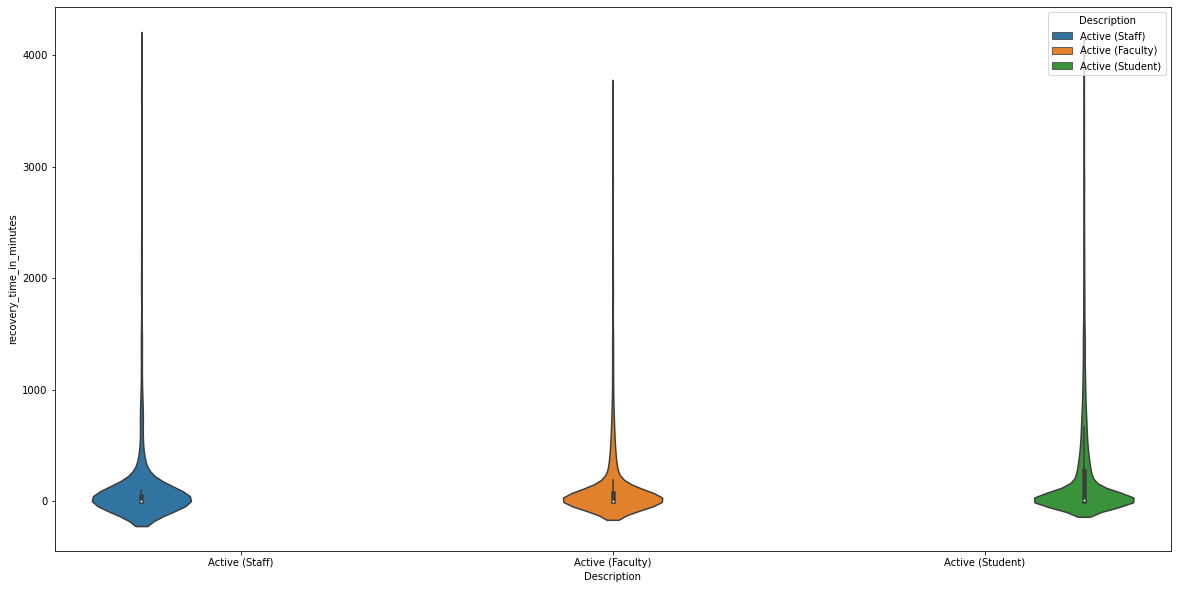

In [96]:
sns.violinplot(data=a, x="Description", y="recovery_time_in_minutes", hue="Description")

In [118]:
y.groupby('Description')['recovery_time_in_minutes'].mean()

Description
Active (Faculty)    265.860688
Active (Staff)      321.009330
Active (Student)    541.228599
Name: recovery_time_in_minutes, dtype: float64

In [119]:
y

,user,recovery_time,Description,recovery_time_in_minutes
0,user_000001,19,Active (Staff),0
1,user_000002,30067,Active (Staff),501
2,user_000003,345,Active (Staff),5
3,user_000004,5,Active (Staff),0
4,user_000005,164,Active (Staff),2


In [130]:
y['user'].count()

35883

In [137]:
u = y[y['recovery_time_in_minutes']<30]

In [138]:
u['user'].count()

20510

In [578]:
u = y[['int_recovery_time','user','Description']].groupby(['int_recovery_time','Description']).count()

In [592]:
u = y[['int_recovery_time','Description']].groupby(['int_recovery_time','Description']).count()

In [593]:
u.head()

Empty DataFrame
Columns: []
Index: [(0.0, Active (Faculty)), (0.0, Active (Staff)), (0.0, Active (Student)), (1.0, Active (Student)), (2.0, Active (Faculty))]

In [585]:
u.user.mean()

2.24957619137314

In [581]:
k = u.reset_index(level=1)

In [582]:
k = u.unstack(level=1)
k.columns = k.columns.droplevel()

In [583]:
k.head()

Description,Active (Faculty),Active (Staff),Active (Student)
int_recovery_time,,,
0.0,247.0,122.0,4091.0
1.0,NaN,NaN,9.0
2.0,1.0,NaN,8.0
3.0,3.0,1.0,91.0
4.0,8.0,6.0,235.0


In [574]:
k['Active (Staff)'].mean()

count    638.000000
mean       1.847962
std        5.260894
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      122.000000
Name: Active (Staff), dtype: float64

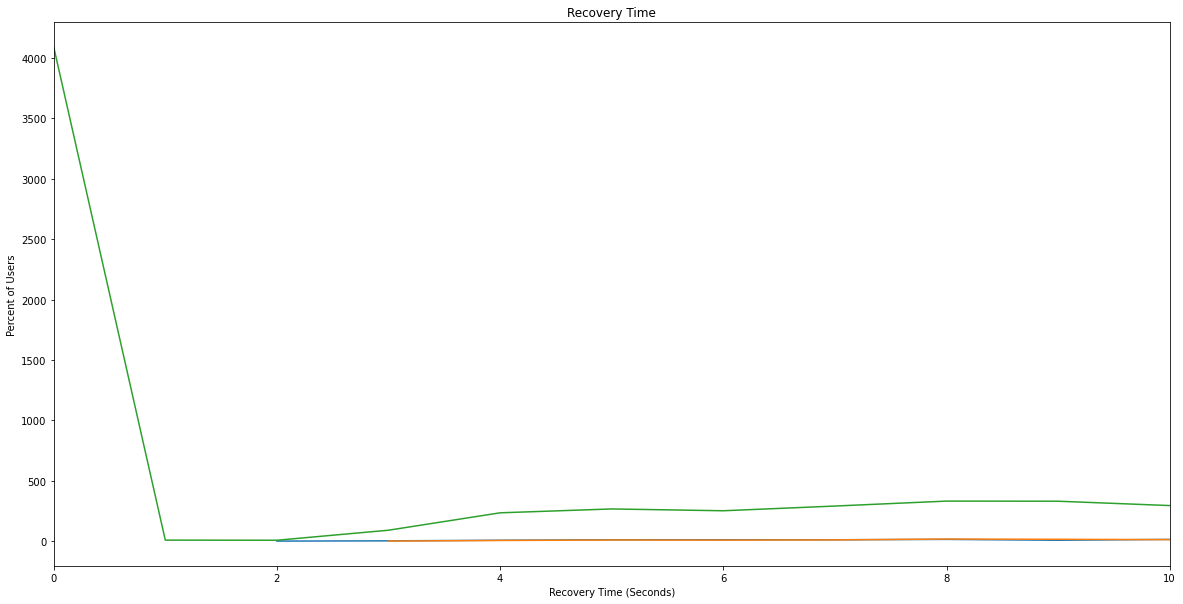

In [557]:
plt.plot(k)
plt.xlabel('Recovery Time (Seconds)')
plt.ylabel('Percent of Users')
plt.title('Recovery Time')
plt.xlim(0,10)
plt.show()

In [626]:
y.head()

,user,recovery_time,int_recovery_time,Description
0,user_000001,19.4172,19.0,Active (Staff)
1,user_000002,30067.6,30067.0,Active (Staff)
2,user_000003,345.067,345.0,Active (Staff)
3,user_000004,5.26279,5.0,Active (Staff)
4,user_000005,164.743,164.0,Active (Staff)


In [627]:
c = y.groupby(['int_recovery_time']).count()

In [628]:
c.head()

,user,recovery_time,Description
int_recovery_time,,,
0.0,4460,4460,4460
1.0,9,9,9
2.0,9,9,9
3.0,95,95,95
4.0,249,249,249


In [635]:
y['int_recovery_time'].mean()

31231.81392168355

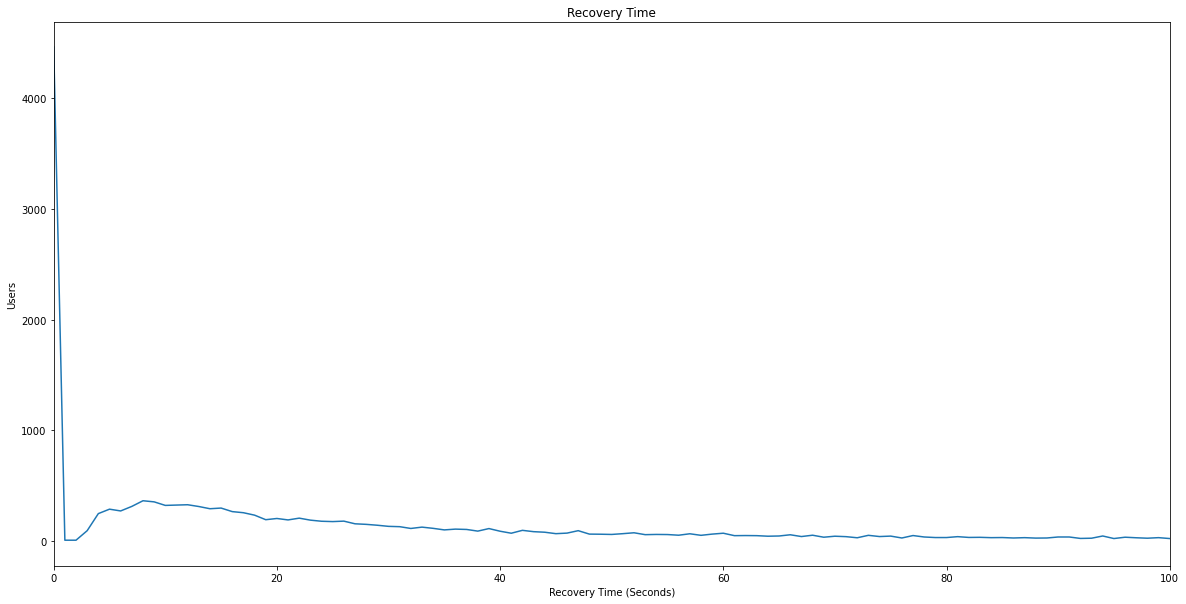

In [637]:


plt.plot(c['user'])
plt.xlabel('Recovery Time (Seconds)')
plt.ylabel('Users')
plt.title('Recovery Time')
plt.xlim(0,100)
plt.show()

In [710]:
averageLoginsPerUser = authenticationFailures

In [711]:
averageLoginsPerUser.head()

,Timestamp (UTC),Alias,Integration,Factor,Result,Reason,Enrollment,Access Device Country,Access Device State,Access Device City,Access Device Hostname,date,month,hour,minute,second,Description
10,2021-04-01 07:00:38.171370+00:00,user_048070,Single Sign-On,Duo Push,FAILURE,No response,False,US,California,West Sacramento,NaN,2021-04-01,4,7,0,38,Active (Student)
14,2021-04-01 07:00:47.088446+00:00,user_018970,Single Sign-On,Duo Push,FAILURE,No response,False,US,California,Oxnard,NaN,2021-04-01,4,7,0,47,Active (Student)
33,2021-04-01 07:01:52.897370+00:00,user_021380,Single Sign-On,NaN,FAILURE,User cancelled,False,US,California,Oakland,NaN,2021-04-01,4,7,1,52,Active (Student)
68,2021-04-01 07:04:24.186870+00:00,user_051724,Single Sign-On,Duo Push,FAILURE,No response,False,JP,Aomori,Misawa,NaN,2021-04-01,4,7,4,24,Active (Student)
84,2021-04-01 07:05:29.947741+00:00,user_017591,Single Sign-On,NaN,FAILURE,User cancelled,False,US,California,Sacramento,NaN,2021-04-01,4,7,5,29,Active (Student)


In [712]:
averageLoginsPerDay = averageLoginsPerUser[['Alias','date','Result']].groupby(['Alias','date']).count()

In [713]:
averageLoginsPerDay = averageLoginsPerDay.unstack()

In [714]:
averageLoginsPerDay.head(1)

Result                                                         \
date        2020-11-01 2020-11-02 2020-11-03 2020-11-04 2020-11-05 2020-11-06   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-11-07 2020-11-08 2020-11-09 2020-11-10 2020-11-11 2020-11-12   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        2.0        NaN   

                                                                               \
date        2020-11-13 2020-11-14 2020-11-15 2020-11-16 2020-11-17 2020-11-18   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-11-19 2020-11-20 2020-11-21 2020-11-22 2020-11-23 2020-11-24   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-11-25 2020-11-26 2020-11-27 2020-11-28 2020-11-29 2020-11-30   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-01 2020-12-02 2020-12-03 2020-12-04 2020-12-05 2020-12-06   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-07 2020-12-08 2020-12-09 2020-12-10 2020-12-11 2020-12-12   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-13 2020-12-14 2020-12-15 2020-12-16 2020-12-17 2020-12-18   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-19 2020-12-20 2020-12-21 2020-12-22 2020-12-23 2020-12-24   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-25 2020-12-26 2020-12-27 2020-12-28 2020-12-29 2020-12-30   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2020-12-31 2021-01-01 2021-01-02 2021-01-03 2021-01-04 2021-01-05   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2021-01-06 2021-01-07 2021-01-08 2021-01-09 2021-01-10 2021-01-11   
Alias                                                                           
user_000001        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                               \
date        2021-01-12 2021-01-13 2

In [689]:
import math

In [726]:
loginsPerDay = averageLoginsPerDay.apply(lambda logins: getAverageLogins(logins), axis=1)

In [725]:
def getAverageLogins(logins):
    cleanLogins = logins.dropna()
#     print(logins.index[0])
#     print(int(cleanLogins.sum() / len(cleanLogins)))
#     return cleanLogins.max()
    return math.ceil(cleanLogins.sum() / len(cleanLogins))

(0.0, 80.0)

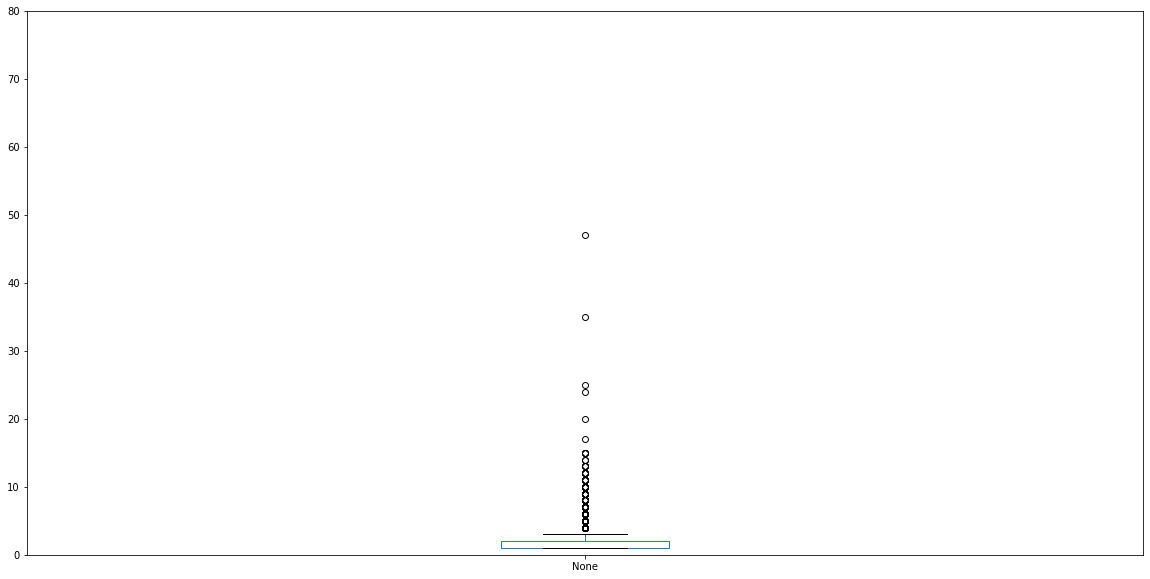

In [727]:
loginsPerDay.plot.box()
plt.ylim(0,80)

In [729]:
loginsPerDay[loginsPerDay>10]

Alias
user_001847    15
user_005035    13
user_007096    13
user_010897    13
user_012959    12
user_014539    13
user_015929    12
user_015947    12
user_018274    14
user_018370    14
user_020352    15
user_021979    25
user_023465    11
user_023545    35
user_026562    11
user_027679    15
user_029092    15
user_030841    12
user_032033    12
user_038190    47
user_042725    11
user_042995    11
user_043046    11
user_043074    20
user_045771    17
user_046787    24
user_049538    11
user_050724    12
dtype: int64